</font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

In [1]:
filename_version='2dot8'

In [2]:
import sys
sys.path.append("/Users/pauljacob/Library/Python/3.8/lib/python/site-packages")

In [3]:
#file structure
!pip3 install cookiecutter

#general
!pip3 install --upgrade pip
!pip3 install ipython-autotime --quiet

#ML
!pip3 install forestci
!pip3 install duecredit


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
%load_ext autotime

time: 251 µs (started: 2022-10-19 16:43:43 -07:00)


## Import Libraries

In [5]:
#get libraries
import pandas as pd
import os
import numpy as np
#from functools import reduce


#get visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

class color:
   BOLD = '\033[1m'
   END = '\033[0m'

    
#get ML functions
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import __version__ as sklearn_version
import datetime
#from sklearn.pipeline import make_pipeline

#get ML metric functions
from sklearn.metrics import precision_score, recall_score


#get icr module and associated common functions
import in_vehicle_coupon_recommendation as icr
from in_vehicle_coupon_recommendation import p, rcp, rpp, rcr, sr, pl, pdc, save_and_return_data_frame, initialize_custom_notebook_settings

time: 1.91 s (started: 2022-10-19 16:43:43 -07:00)


In [6]:
#initialize notebook
initialize_custom_notebook_settings()

time: 1.99 ms (started: 2022-10-19 16:43:45 -07:00)


## Get In-Vehicle Coupon Recommendation Dataset

In [7]:
df = pd.read_csv(os.path.join('..', 'data', 'raw', 'in-vehicle-coupon-recommendation.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [8]:
p(df)

(12684, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,NaN,never,never,1~3,4~8,1~3,1,0,0,1,0,0


time: 12.8 ms (started: 2022-10-19 16:43:45 -07:00)


<font size="5"><a id='[Data_Wrangling]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Data_Wrangling]'>**Data Wrangling**</a> </font>

In [9]:
#rename 'passanger' and 'coupon' column
df = df.rename(columns={'passanger':'passenger', 'coupon':'coupon_venue_type'})



#decode string 'age' values to (explicit) string age ranges
column_name_age_value_list = list(df.loc[:, 'age'].unique())
column_name_age_value_list_cleaned_up = ['21-25', '46-49', '26-30', '31-35', '41-45', '50+', '36-40', '<21']
column_name_age_value_dict = dict(zip(column_name_age_value_list, column_name_age_value_list_cleaned_up))
df.loc[:, 'age'] = df.loc[:, 'age'].replace(column_name_age_value_dict)



#drop column 'toCoupon_GEQ5min' because all 1's
column_name_list_not_toCoupon_GEQ5min = [column_name for column_name in df.columns if column_name != 'toCoupon_GEQ5min']
df = df.loc[:, column_name_list_not_toCoupon_GEQ5min]



#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language...
#get column name list for column values uniques that are the same as column name 'CarryAway' value uniques
column_name_list_same_unique_values = []
for column_name in df.columns:    
    value = icr.column_name_value_sets_equal(df, column_name1='CarryAway', column_name2=column_name)
    if value == 1:
        column_name_list_same_unique_values = column_name_list_same_unique_values + [column_name]
#rename values in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', and 'Restaurant20To50' to math language
column_name_Bar_value_list = list(df.loc[:, 'Bar'].unique())
column_name_Bar_value_list_cleaned_up = ['never', '<1', '1-3', '>8', np.nan, '4-8']
column_name_Bar_value_dict = dict(zip(column_name_Bar_value_list, column_name_Bar_value_list_cleaned_up))
df.loc[:, column_name_list_same_unique_values] = df.loc[:, column_name_list_same_unique_values].replace(column_name_Bar_value_dict)



#clean up columns 'direction_same' and 'direction_opp' to 'direction_same_or_opposite'
#drop column 'direction_same'
column_name_list_not_direction_same = [column_name for column_name in df.columns if column_name != 'direction_same']
df = df.loc[:, column_name_list_not_direction_same]
#rename 'direction_opp' to 'direction_same_or_opposite'
df = df.rename(columns={'direction_opp':'direction_same_or_opposite'})



#dealing with missing values:
    #solution1: fill in missing values with 'no response' or 'unknown'
    #solution2: fillna with mode of column
    #solution3: use other features to predict what NaN values of occurences per month variables
    #solution4: drop the rows that have null values

#solution1: fill in missing values with 'no response' or 'unknown'
column_name_list = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'car']
df.loc[:, column_name_list] = df.loc[:, column_name_list].fillna('no response')
p(df)

(12684, 24)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,1,1,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,0


time: 76.1 ms (started: 2022-10-19 16:43:45 -07:00)


<font size="5"><a id='[Feature_Engineering]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Feature_Engineering]'>**Feature Engineering**</a> </font>

## Get Category Representative Numeric Encoding for Features: expiration, time, age, income

In [10]:
#category representative numeric encoding: expiration, time, age, income

expiration_category_representative_numeric_encoding={'expiration':{'2h':2, '1d':24}}
time_category_representative_numeric_encoding={'time':{'7AM':7,'10AM':10, '2PM':14, '6PM':18, '10PM':22}}
age_category_representative_numeric_encoding={'age':{'<21':18, '21-25':23, '26-30':28, '31-35':33, '36-40':38, '41-45':43, '46-49':48, '50+':56}}
income_category_representative_numeric_encoding={'income':{'Less than $12500':6250, '$12500 - $24999':18749.5, '$25000 - $37499':31249.5, '$37500 - $49999':43749.5, '$50000 - $62499':56249.5, '$62500 - $74999':68749.5, '$75000 - $87499':81249.5, '$87500 - $99999':93749.5,'$100000 or More':150000}}

#combine category representative numeric encoding dictionaries
category_representative_numeric_encoding_dictionary = expiration_category_representative_numeric_encoding|time_category_representative_numeric_encoding|age_category_representative_numeric_encoding|income_category_representative_numeric_encoding

category_representative_numeric_encoding_key_list = list(category_representative_numeric_encoding_dictionary.keys())

df_category_representative_numeric_encoding = df.loc[:, category_representative_numeric_encoding_key_list].replace(category_representative_numeric_encoding_dictionary)

#rename columns
category_representative_numeric_encoding_substring='_category_representative_numeric_encoding'

column_name_list_category_representative_numeric_encoding = [str(column_name) + category_representative_numeric_encoding_substring for column_name in category_representative_numeric_encoding_key_list]

column_name_dictionary_category_representative_numeric_encoding = dict(zip(category_representative_numeric_encoding_key_list, column_name_list_category_representative_numeric_encoding))

df_category_representative_numeric_encoding = df_category_representative_numeric_encoding.rename(columns=column_name_dictionary_category_representative_numeric_encoding)

p(df_category_representative_numeric_encoding)

(12684, 4)


,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding
0,24,14,23,43749.5
1,2,10,23,43749.5
2,2,10,23,43749.5
3,2,14,23,43749.5
4,24,14,23,43749.5
12679,24,18,28,81249.5
12680,24,7,28,81249.5
12681,24,7,28,81249.5
12682,24,7,28,81249.5
12683,2,7,28,81249.5


time: 28.3 ms (started: 2022-10-19 16:43:45 -07:00)


## Get Binary Encoding for Features: gender, expiration

In [11]:
#binary encoding: gender, expiration
gender_binary_encoding={'gender':{'Female':0, 'Male':1}}
expiration_binary_encoding={'expiration':{'2h':0, '1d':1}}

binary_encoding_dictionary = gender_binary_encoding|expiration_binary_encoding

binary_encoding_key_list = list(binary_encoding_dictionary.keys())

df_binary_encoding = df.loc[:, binary_encoding_key_list].replace(binary_encoding_dictionary)


#rename columns
binary_encoding_substring = '_binary_encoding'
column_name_list_binary_encoding = [str(column_name) + binary_encoding_substring for column_name in binary_encoding_key_list]
column_name_dictionary_binary_encoding = dict(zip(binary_encoding_key_list, column_name_list_binary_encoding))
df_binary_encoding = df_binary_encoding.rename(columns=column_name_dictionary_binary_encoding)

p(df_binary_encoding)

(12684, 2)


,gender_binary_encoding,expiration_binary_encoding
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1
12679,1,1
12680,1,1
12681,1,1
12682,1,1
12683,1,0


time: 15 ms (started: 2022-10-19 16:43:45 -07:00)


## Get Ordinal Integer Encoding for Features: coupon_venue_type, education, income, age, time, temperature

In [12]:
#ordinal integer encoding: coupon_venue_type, education, income, age, time, temperature

#category ordinal features to ordinal integer encoding
coupon_venue_type_ordinal_integer_encoding={'coupon_venue_type':{'Coffee House':1, 'Bar':2, 'Carry out & Take away':3, 'Restaurant(<20)':4, 'Restaurant(20-50)':5}}
education_ordinal_integer_encoding={'education':{'Some High School':1, 'High School Graduate':2, 'Some college - no degree':3, 'Associates degree':4, 'Bachelors degree':5,'Graduate degree (Masters or Doctorate)':6}}
income_ordinal_integer_encoding={'income':{'Less than $12500':1, '$12500 - $24999':2, '$25000 - $37499':3, '$37500 - $49999':4, '$50000 - $62499':5, '$62500 - $74999':6, '$75000 - $87499':7, '$87500 - $99999':8, '$100000 or More':9}}
age_ordinal_integer_encoding={'age':{'<21':1, '21-25':2, '26-30':3, '31-35':4, '36-40':5, '41-45':6, '46-49':7, '50+':8}}
time_ordinal_integer_encoding={'time':{'7AM':1, '10AM':2, '2PM':3, '6PM':4, '10PM':5}}

#numeric to ordinal integer encoding
temperature_ordinal_integer_encoding={'temperature':{30:1, 55:2, 80:3}}


ordinal_integer_encoding_dictionary = coupon_venue_type_ordinal_integer_encoding|education_ordinal_integer_encoding|income_ordinal_integer_encoding|age_ordinal_integer_encoding|time_ordinal_integer_encoding|temperature_ordinal_integer_encoding

ordinal_integer_encoding_key_list = list(ordinal_integer_encoding_dictionary.keys())

df_ordinal_integer_encoding = df.loc[:, ordinal_integer_encoding_key_list].replace(ordinal_integer_encoding_dictionary)

#rename columns
ordinal_integer_encoding_substring='_ordinal_integer_encoding'
column_name_list_ordinal_integer_encoding=[str(column_name) + ordinal_integer_encoding_substring for column_name in ordinal_integer_encoding_key_list]
column_name_dictionary_ordinal_integer_encoding=dict(zip(ordinal_integer_encoding_key_list,column_name_list_ordinal_integer_encoding))
df_ordinal_integer_encoding=df_ordinal_integer_encoding.rename(columns=column_name_dictionary_ordinal_integer_encoding)

p(df_ordinal_integer_encoding)

(12684, 6)


,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding
0,4,3,4,2,3,2
1,1,3,4,2,2,3
2,3,3,4,2,2,3
3,1,3,4,2,3,3
4,1,3,4,2,3,3
12679,3,5,7,3,4,2
12680,3,5,7,3,1,2
12681,1,5,7,3,1,1
12682,2,5,7,3,1,1
12683,5,5,7,3,1,3


time: 41 ms (started: 2022-10-19 16:43:45 -07:00)


## Get Venue Type Visits Per Month Yes Response to Ordinal Integer Encoding for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [13]:
#venue type visits per month yes response to ordinal integer encoding: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_yes_response_ordinal_integer_encoding={'Bar':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
coffeehouse_yes_response_ordinal_integer_encoding={'CoffeeHouse':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
carryaway_yes_response_ordinal_integer_encoding={'CarryAway':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurantlessthan20_yes_response_ordinal_integer_encoding={'RestaurantLessThan20':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}
restaurant20to50_yes_response_ordinal_integer_encoding={'Restaurant20To50':{'never':1, '<1':2, '1-3':3, '4-8':4, '>8':5, 'no response':0}}


yes_response_ordinal_integer_encoding_dictionary=bar_yes_response_ordinal_integer_encoding|coffeehouse_yes_response_ordinal_integer_encoding|carryaway_yes_response_ordinal_integer_encoding|restaurantlessthan20_yes_response_ordinal_integer_encoding|restaurant20to50_yes_response_ordinal_integer_encoding

yes_response_ordinal_integer_encoding_key_list=list(yes_response_ordinal_integer_encoding_dictionary.keys())

df_yes_response_ordinal_integer_encoding = df.loc[:, yes_response_ordinal_integer_encoding_key_list].replace(yes_response_ordinal_integer_encoding_dictionary)

#rename columns
yes_response_ordinal_integer_encoding_substring='_yes_response_ordinal_integer_encoding'
column_name_list_yes_response_ordinal_integer_encoding=[str(column_name) + yes_response_ordinal_integer_encoding_substring for column_name in yes_response_ordinal_integer_encoding_key_list]
column_name_dictionary_yes_response_ordinal_integer_encoding=dict(zip(yes_response_ordinal_integer_encoding_key_list, column_name_list_yes_response_ordinal_integer_encoding))
df_yes_response_ordinal_integer_encoding = df_yes_response_ordinal_integer_encoding.rename(columns=column_name_dictionary_yes_response_ordinal_integer_encoding)

p(df_yes_response_ordinal_integer_encoding)

(12684, 5)


,Bar_yes_response_ordinal_integer_encoding,CoffeeHouse_yes_response_ordinal_integer_encoding,CarryAway_yes_response_ordinal_integer_encoding,RestaurantLessThan20_yes_response_ordinal_integer_encoding,Restaurant20To50_yes_response_ordinal_integer_encoding
0,1,1,0,4,3
1,1,1,0,4,3
2,1,1,0,4,3
3,1,1,0,4,3
4,1,1,0,4,3
12679,1,1,3,4,3
12680,1,1,3,4,3
12681,1,1,3,4,3
12682,1,1,3,4,3
12683,1,1,3,4,3


time: 41.5 ms (started: 2022-10-19 16:43:45 -07:00)


## Get Venue Type Visits Per Month No Response to Indicator Variable for Features: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50

In [14]:
#venue type visits per month no response to indicator variable: bar, coffeehouse, carryaway, restaurantlessthan20, restaurant20to50
bar_no_response_indicator_variable={'Bar':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
coffeehouse_no_response_indicator_variable={'CoffeeHouse':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
carryaway_no_response_indicator_variable={'CarryAway':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurantlessthan20_no_response_indicator_variable={'RestaurantLessThan20':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}
restaurant20to50_no_response_indicator_variable={'Restaurant20To50':{'never':0, '<1':0, '1-3':0, '4-8':0, '>8':0, 'no response':1}}

no_response_indicator_variable_dictionary=bar_no_response_indicator_variable|coffeehouse_no_response_indicator_variable|carryaway_no_response_indicator_variable|restaurantlessthan20_no_response_indicator_variable|restaurant20to50_no_response_indicator_variable

no_response_indicator_variable_key_list=list(no_response_indicator_variable_dictionary.keys())

df_no_response_indicator_variable=df.loc[:, no_response_indicator_variable_key_list].replace(no_response_indicator_variable_dictionary)

#rename columns
no_response_indicator_variable='_no_response_indicator'
column_name_list_no_response_indicator_variable=[str(column_name) + no_response_indicator_variable for column_name in no_response_indicator_variable_key_list]
column_name_dictionary_no_response_indicator_variable=dict(zip(no_response_indicator_variable_key_list, column_name_list_no_response_indicator_variable))
df_no_response_indicator_variable=df_no_response_indicator_variable.rename(columns=column_name_dictionary_no_response_indicator_variable)

p(df_no_response_indicator_variable)

(12684, 5)


,Bar_no_response_indicator,CoffeeHouse_no_response_indicator,CarryAway_no_response_indicator,RestaurantLessThan20_no_response_indicator,Restaurant20To50_no_response_indicator
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
12679,0,0,0,0,0
12680,0,0,0,0,0
12681,0,0,0,0,0
12682,0,0,0,0,0
12683,0,0,0,0,0


time: 39.3 ms (started: 2022-10-19 16:43:45 -07:00)


## Concatenate the Data Frames

In [15]:
#concatenate the data frames

#get data frame list
data_frame_list=[df, df_category_representative_numeric_encoding, df_binary_encoding, df_ordinal_integer_encoding, df_yes_response_ordinal_integer_encoding, df_no_response_indicator_variable]

#concat data frames
df = pd.concat(data_frame_list, axis=1)

p(df)

(12684, 46)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_yes_response_ordinal_integer_encoding,CoffeeHouse_yes_response_ordinal_integer_encoding,CarryAway_yes_response_ordinal_integer_encoding,RestaurantLessThan20_yes_response_ordinal_integer_encoding,Restaurant20To50_yes_response_ordinal_integer_encoding,Bar_no_response_indicator,CoffeeHouse_no_response_indicator,CarryAway_no_response_indicator,RestaurantLessThan20_no_response_indicator,Restaurant20To50_no_response_indicator
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,0,0,1,1,24,14,23,43749.5,0,1,4,3,4,2,3,2,1,1,0,4,3,0,0,1,0,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,0,0,1,0,2,10,23,43749.5,0,0,1,3,4,2,2,3,1,1,0,4,3,0,0,1,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,1,2,10,23,43749.5,0,0,3,3,4,2,2,3,1,1,0,4,3,0,0,1,0,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,0,2,14,23,43749.5,0,0,1,3,4,2,3,3,1,1,0,4,3,0,0,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,0,24,14,23,43749.5,0,1,1,3,4,2,3,3,1,1,0,4,3,0,0,1,0,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,1,24,18,28,81249.5,1,1,3,5,7,3,4,2,1,1,3,4,3,0,0,0,0,0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,1,1,24,7,28,81249.5,1,1,3,5,7,3,1,2,1,1,3,4,3,0,0,0,0,0
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,0,24,7,28,81249.5,1,1,1,5,7,3,1,1,1,1,3,4,3,0,0,0,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,1,1,1,0,24,7,28,81249.5,1,1,2,5,7,3,1,1,1,1,3,4,3,0,0,0,0,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,0,2,7,28,81249.5,1,0,5,5,7,3,1,3,1,1,3,4,3,0,0,0,0,0


time: 17.7 ms (started: 2022-10-19 16:43:45 -07:00)


<font size="5"><a id='[Exploratory_Data_Analysis]'></a></font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Exploratory_Data_Analysis]'>**Exploratory Data Analysis**</a> </font>

In [16]:
#get plots for all the features
p(df)

(12684, 46)


,destination,passenger,weather,temperature,time,coupon_venue_type,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,Y,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_yes_response_ordinal_integer_encoding,CoffeeHouse_yes_response_ordinal_integer_encoding,CarryAway_yes_response_ordinal_integer_encoding,RestaurantLessThan20_yes_response_ordinal_integer_encoding,Restaurant20To50_yes_response_ordinal_integer_encoding,Bar_no_response_indicator,CoffeeHouse_no_response_indicator,CarryAway_no_response_indicator,RestaurantLessThan20_no_response_indicator,Restaurant20To50_no_response_indicator
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,0,0,1,1,24,14,23,43749.5,0,1,4,3,4,2,3,2,1,1,0,4,3,0,0,1,0,0
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,0,0,1,0,2,10,23,43749.5,0,0,1,3,4,2,2,3,1,1,0,4,3,0,0,1,0,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,1,2,10,23,43749.5,0,0,3,3,4,2,2,3,1,1,0,4,3,0,0,1,0,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,0,2,14,23,43749.5,0,0,1,3,4,2,3,3,1,1,0,4,3,0,0,1,0,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21-25,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,no response,never,never,no response,4-8,1-3,1,0,1,0,24,14,23,43749.5,0,1,1,3,4,2,3,3,1,1,0,4,3,0,0,1,0,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,1,24,18,28,81249.5,1,1,3,5,7,3,4,2,1,1,3,4,3,0,0,0,0,0
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,1,1,24,7,28,81249.5,1,1,3,5,7,3,1,2,1,1,3,4,3,0,0,0,0,0
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,0,24,7,28,81249.5,1,1,1,5,7,3,1,1,1,1,3,4,3,0,0,0,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,1,1,1,0,24,7,28,81249.5,1,1,2,5,7,3,1,1,1,1,3,4,3,0,0,0,0,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26-30,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,no response,never,never,1-3,4-8,1-3,0,0,0,0,2,7,28,81249.5,1,0,5,5,7,3,1,3,1,1,3,4,3,0,0,0,0,0


time: 16.1 ms (started: 2022-10-19 16:43:45 -07:00)


In [17]:
#take top features and check for statistical significant between them by response, i.e. did accept or did not accept coupon.

top_feature = 'expiration_category_representative_numeric_encoding'

df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted = df.loc[df.loc[:, 'Y'] == 0, [top_feature] + ['Y']]
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted = df.loc[df.loc[:, 'Y'] == 1, [top_feature] + ['Y']]

time: 8.45 ms (started: 2022-10-19 16:43:45 -07:00)


In [18]:
#Proportion Hypothesis Tests for Binary Data

#https://statisticsbyjim.com/hypothesis-testing/comparing-hypothesis-tests-data-types/

#2 Proportions test to compare two samples

#1 Proportion test example: comparison to a target

time: 218 µs (started: 2022-10-19 16:43:45 -07:00)


In [19]:
df_expiration_category_representative_numeric_encoding_Y_coupon_not_accepted.value_counts()

expiration_category_representative_numeric_encoding  Y
2                                                    0    2819
24                                                   0    2655
dtype: int64

time: 4.54 ms (started: 2022-10-19 16:43:45 -07:00)


In [20]:
df_expiration_category_representative_numeric_encoding_Y_coupon_accepted.value_counts()

expiration_category_representative_numeric_encoding  Y
24                                                   1    4436
2                                                    1    2774
dtype: int64

time: 3.36 ms (started: 2022-10-19 16:43:45 -07:00)


In [21]:
4436 / (4436 + 2774)

0.615256588072122

time: 1.23 ms (started: 2022-10-19 16:43:45 -07:00)


In [22]:
#of scenarios where the the coupon is accepted, 61.5% of the time, it's a 24hours til expiration 

time: 170 µs (started: 2022-10-19 16:43:45 -07:00)


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabe

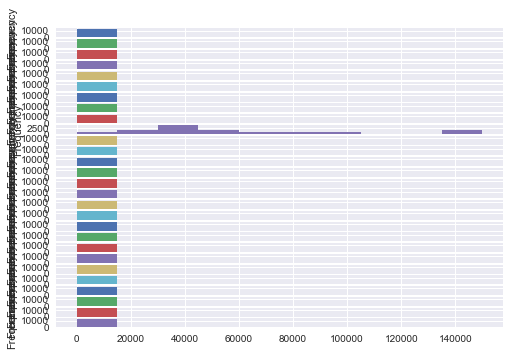

time: 1.46 s (started: 2022-10-19 16:43:45 -07:00)


In [23]:
plt.style.use('seaborn')

# Plotting as desired
df.plot.hist(subplots=True, legend=False)

In [24]:
# from io import StringIO
# import pandas as pd
# import matplotlib.pyplot as plt
# plt.style.use('seaborn')

# # Here I read your example data in
# df = pd.read_fwf(StringIO("""
#     X              Y          Z
# 0   1.000000    1.000000    1.014925    
# 1   1.000000    1.000000    1.000000
# """), header=1, index_col=0)

# # Plotting as desired
# df.plot.hist(subplots=True, legend=False)

time: 288 µs (started: 2022-10-19 16:43:47 -07:00)


In [25]:
#five types of coupons:
#bars
#takeaway food restaurants
#coffee houses
#cheap restaurants (average expense below $20 per person)
#expensive restaurants (average expense between $20 to $50 per person)

df.loc[:, 'coupon_venue_type'].value_counts()


Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon_venue_type, dtype: int64

time: 2.56 ms (started: 2022-10-19 16:43:47 -07:00)


/var/folders/77/y4hv4_s9751293nzv4yrfrtm0000gn/T/ipykernel_1312/3831391204.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


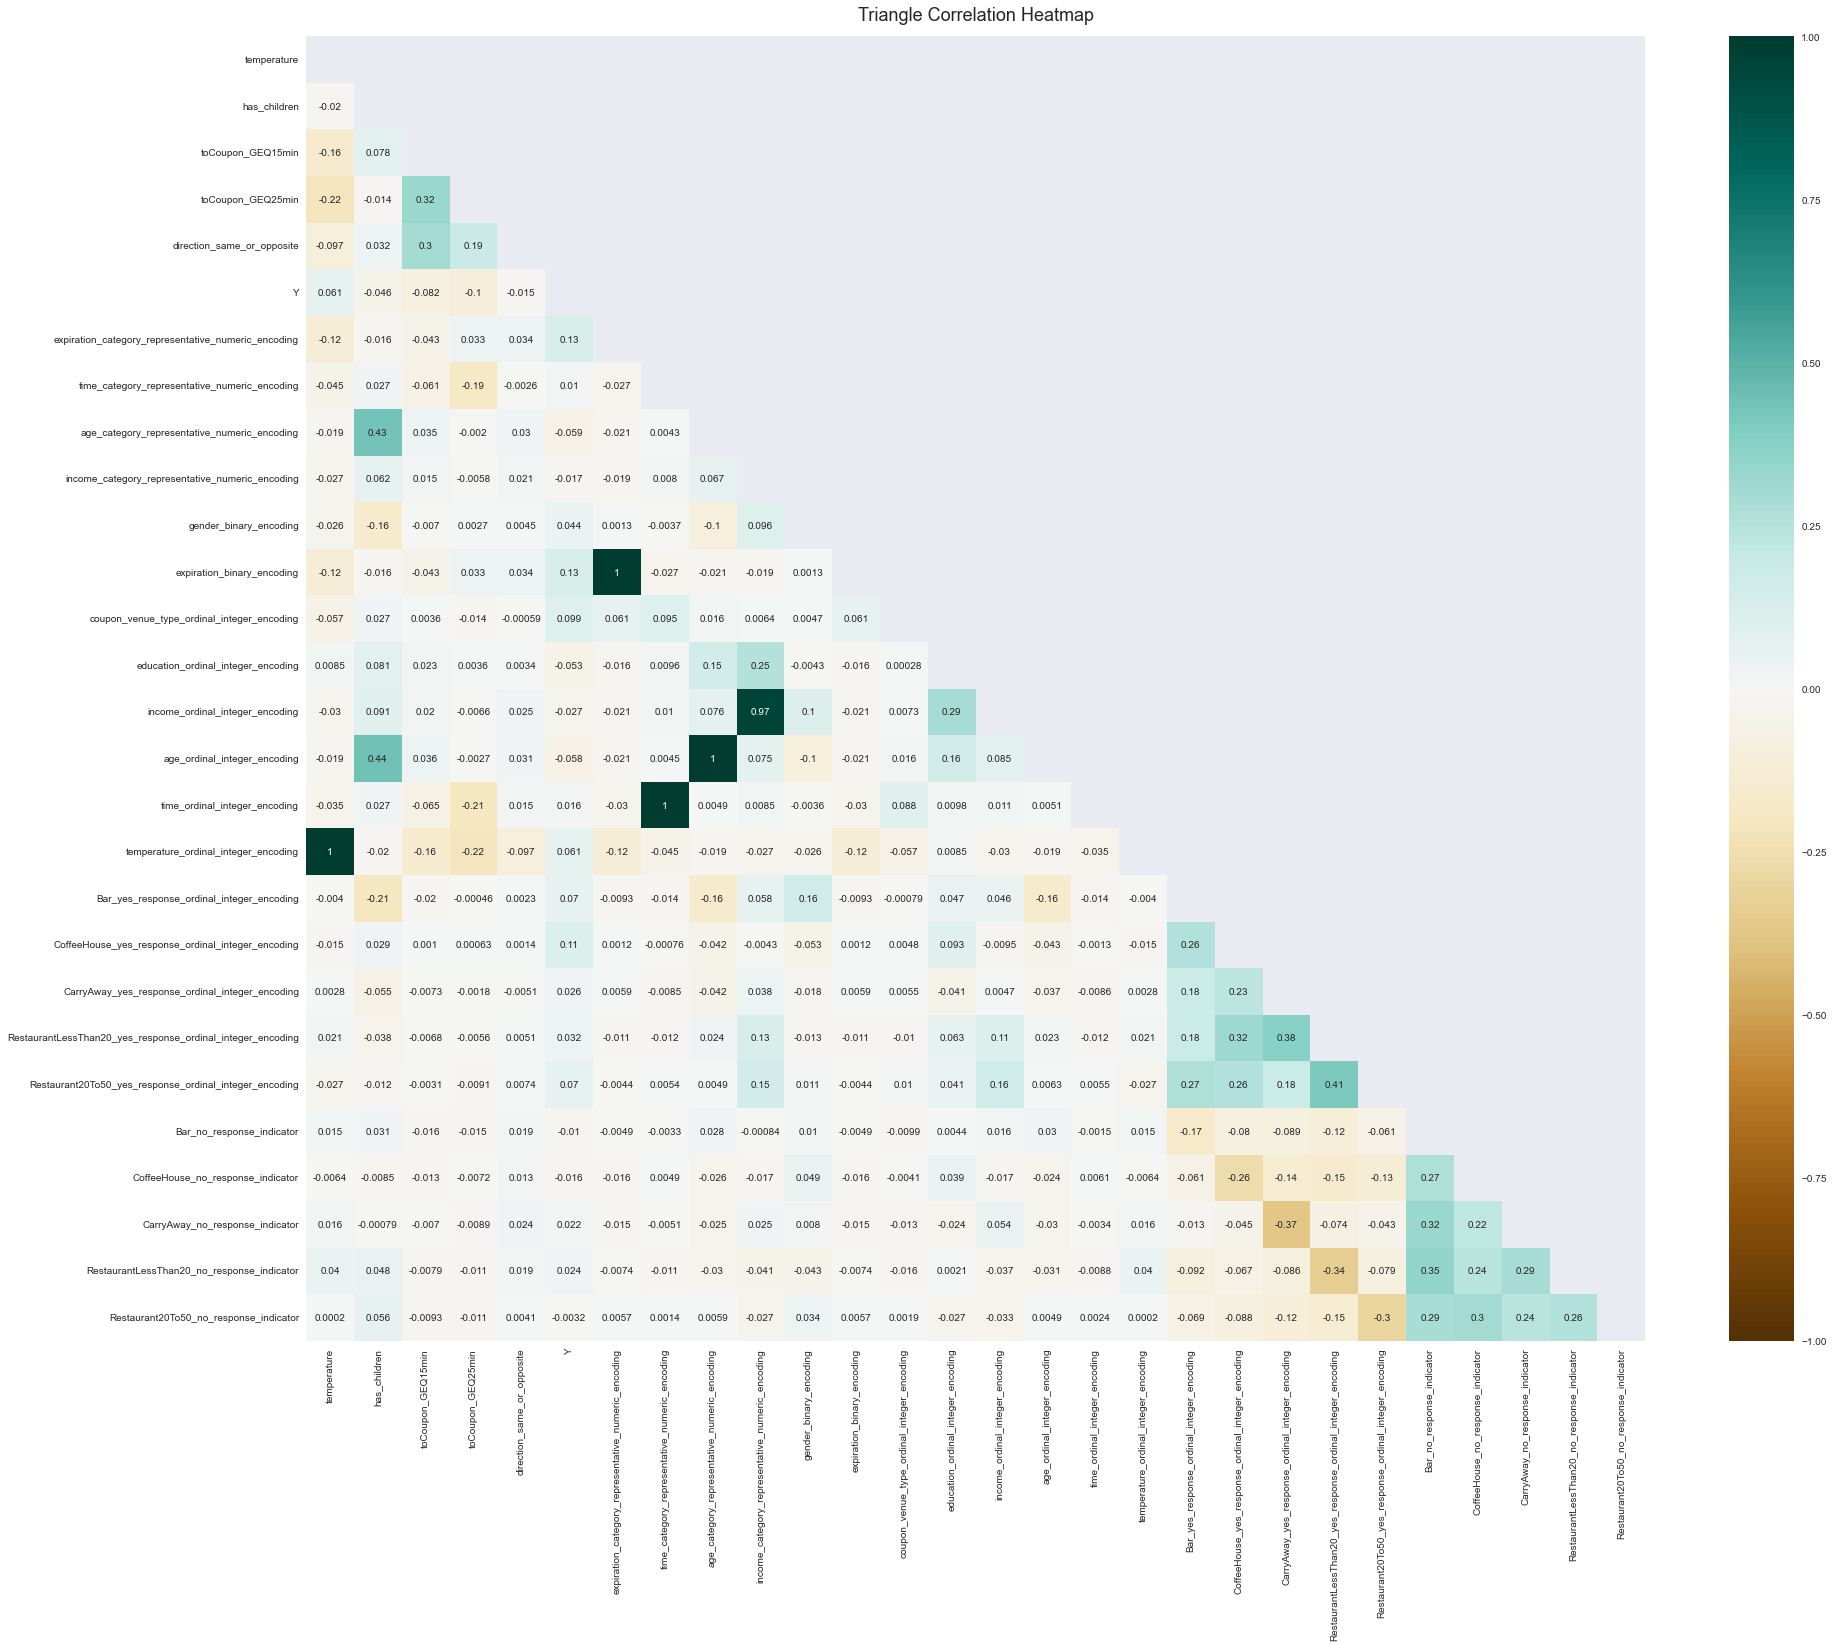

time: 9.39 s (started: 2022-10-19 16:43:47 -07:00)


In [26]:
#correlation heatmap

plt.figure(figsize=(30, 24))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.savefig('../reports/figures/figure_triangle_correlation_heatmap_random_forest_classifier_numerics_v' + filename_version + '.png', bbox_inches='tight', dpi=600)

plt.show()

In [27]:
#.11 correlation between coupon acceptance and reported CoffeeHouse venue visit frequency

#.099 correlation between venue coupon type and coupon accpetance

#.13 correlation between coupon expiraton and coupon acceptance

#.07 correaltio between reported expensive restaurant visit frequency and coupon acceptance

#.07 correlation between coupon acceptance and reported bar visit frequency 

#.061 correlation between temperature and coupon acceptance

#-.1 correlation between coupon acceptance and driver travel time to venue is greater than 25 minute

#-.082 correlation between coupon acceptance and driver travel time to venue is greater than 15 minute

#-.046 correlation between having children and accpeting coupon

time: 410 µs (started: 2022-10-19 16:43:56 -07:00)


<font size="5"><a id='[Data_Preprocessing]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Data_Preprocessing]'>**Data Preprocessing**</a> </font>

In [28]:
#get column name lists
column_name_list_numeric = list(df.select_dtypes('number').columns)
column_name_list_not_numeric = [column_name for column_name in df.columns if not column_name in column_name_list_numeric]

#get categorical features, numeric features, and target data frame
df_categorical_features = df.loc[:, column_name_list_not_numeric]
df_numeric_features = df.loc[:, column_name_list_numeric].drop(columns='Y')
df_target = df.loc[:, ['Y']]

#get category indicators data frame from df_categorical_features
df_category_indicator_features = pd.get_dummies(df_categorical_features)

#combine category indicator features and numeric features
df_indicator_numeric_features = pd.concat([df_category_indicator_features, df_numeric_features], axis=1)
p(df_indicator_numeric_features)


(12684, 140)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_yes_response_ordinal_integer_encoding,CoffeeHouse_yes_response_ordinal_integer_encoding,CarryAway_yes_response_ordinal_integer_encoding,RestaurantLessThan20_yes_response_ordinal_integer_encoding,Restaurant20To50_yes_response_ordinal_integer_encoding,Bar_no_response_indicator,CoffeeHouse_no_response_indicator,CarryAway_no_response_indicator,RestaurantLessThan20_no_response_indicator,Restaurant20To50_no_response_indicator
0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,55,1,0,0,1,24,14,23,43749.5,0,1,4,3,4,2,3,2,1,1,0,4,3,0,0,1,0,0
1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0

time: 61.3 ms (started: 2022-10-19 16:43:56 -07:00)


In [29]:
#standardize and scale feature data frame
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standardized_scaled_df_indicator_numeric_features_ndarray = standard_scaler.fit_transform(df_indicator_numeric_features)
df_indicator_numeric_features_standardized_scaled = pd.DataFrame(standardized_scaled_df_indicator_numeric_features_ndarray, columns=df_indicator_numeric_features.columns)

p(df_indicator_numeric_features_standardized_scaled)

(12684, 140)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_yes_response_ordinal_integer_encoding,CoffeeHouse_yes_response_ordinal_integer_encoding,CarryAway_yes_response_ordinal_integer_encoding,RestaurantLessThan20_yes_response_ordinal_integer_encoding,Restaurant20To50_yes_response_ordinal_integer_encoding,Bar_no_response_indicator,CoffeeHouse_no_response_indicator,CarryAway_no_response_indicator,RestaurantLessThan20_no_response_indicator,Restaurant20To50_no_response_indicator
0,-0.585362,1.009347,-0.576501,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,2.305122,-0.584512,-0.576501,-0.434842,-0.482217,-0.678192,-0.365116,1.884878,0.888114,-0.888114,0.973698,-0.973698,1.944480,-0.502733,-0.437659,-0.340673,-0.307079,-0.239115,-0.405089,-0.212294,-0.205928,-0.820042,-0.774011,2.191433,-0.101761,-0.316214,-0.720572,-0.413491,-0.277185,-0.083584,1.383905,-0.118279,

time: 71.3 ms (started: 2022-10-19 16:43:56 -07:00)


In [30]:
#show near identical columns

time: 159 µs (started: 2022-10-19 16:43:56 -07:00)


In [31]:
#show duplicate columns as a data frame
df_duplicated = df_indicator_numeric_features_standardized_scaled.T.duplicated(keep=False)

p(df_indicator_numeric_features_standardized_scaled.loc[:, df_duplicated])

(12684, 16)


,destination_Work,time_7AM,expiration_1d,gender_Male,Bar_no response,CoffeeHouse_no response,CarryAway_no response,RestaurantLessThan20_no response,Restaurant20To50_no response,gender_binary_encoding,expiration_binary_encoding,Bar_no_response_indicator,CoffeeHouse_no_response_indicator,CarryAway_no_response_indicator,RestaurantLessThan20_no_response_indicator,Restaurant20To50_no_response_indicator
0,-0.576501,-0.576501,0.888114,-0.973698,-0.092237,-0.131932,9.110434,-0.101761,-0.122988,-0.973698,0.888114,-0.092237,-0.131932,9.110434,-0.101761,-0.122988
1,-0.576501,-0.576501,-1.125982,-0.973698,-0.092237,-0.131932,9.110434,-0.101761,-0.122988,-0.973698,-1.125982,-0.092237,-0.131932,9.110434,-0.101761,-0.122988
2,-0.576501,-0.576501,-1.125982,-0.973698,-0.092237,-0.131932,9.110434,-0.101761,-0.122988,-0.973698,-1.125982,-0.092237,-0.131932,9.110434,-0.101761,-0.122988
3,-0.576501,-0.576501,-1.125982,-0.973698,-0.092237,-0.131932,9.110434,-0.101761,-0.122988,-0.973698,-1.125982,-0.092237,-0.131932,9.110434,-0.101761,-0.122988
4,-0.576501,-0.576501,0.888114,-0.973698,-0.092237,-0.131932,9.110434,-0.101761,-0.122988,-0.973698,0.888114,-0.092237,-0.131932,9.110434,-0.101761,-0.122988
12679,-0.576501,-0.576501,0.888114,1.027012,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988,1.027012,0.888114,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988
12680,1.734604,1.734604,0.888114,1.027012,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988,1.027012,0.888114,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988
12681,1.734604,1.734604,0.888114,1.027012,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988,1.027012,0.888114,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988
12682,1.734604,1.734604,0.888114,1.027012,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988,1.027012,0.888114,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988
12683,1.734604,1.734604,-1.125982,1.027012,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988,1.027012,-1.125982,-0.092237,-0.131932,-0.109764,-0.101761,-0.122988


time: 742 ms (started: 2022-10-19 16:43:56 -07:00)


In [32]:
p(df_target)

(12684, 1)


,Y
0,1
1,0
2,1
3,0
4,0
12679,1
12680,1
12681,0
12682,0
12683,0


time: 2.43 ms (started: 2022-10-19 16:43:57 -07:00)


In [33]:
#split the data into train and test

time: 127 µs (started: 2022-10-19 16:43:57 -07:00)


In [34]:
#what is a good split? 70 30?, 80 20?, 90 10???


#get 80 20 for train and test


# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(df_indicator_numeric_features_standardized_scaled, df_target, test_size=.2, random_state=200, stratify=df_target)

#using the class label is the default for stratification

#using the target for stratification introduce some kind of bias??? maybe no??



time: 45.6 ms (started: 2022-10-19 16:43:57 -07:00)


In [35]:
#fair to use stratified splits between train and test????

    #creates an artificially favorable ratio when the sample is split to represent the test set (i.e. like another sample population)
    
    #our dataset is a sample population and our marketing campaign will target a sample population.
    
    
    #the reality is our sample population is like taking a random sample, and targeted ads are shown to the subgroup of another sample population.
    #we can't control target variable data representation going from our survey to the in field targeted ads, so we shouldn't control it here???
    
    #OR
    
    #we are controling the target variable representation to fix a variable we don't want to worry about down the line. Down the line, we will have 
    #more data on customer behavior and considering the size of the hold out set, we want it to be representative of a larger dataset (i.e. our train data
    # which we believe is representative of the target population)
    

time: 477 µs (started: 2022-10-19 16:43:57 -07:00)


In [36]:
p(X_train)

(10147, 140)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_yes_response_ordinal_integer_encoding,CoffeeHouse_yes_response_ordinal_integer_encoding,CarryAway_yes_response_ordinal_integer_encoding,RestaurantLessThan20_yes_response_ordinal_integer_encoding,Restaurant20To50_yes_response_ordinal_integer_encoding,Bar_no_response_indicator,CoffeeHouse_no_response_indicator,CarryAway_no_response_indicator,RestaurantLessThan20_no_response_indicator,Restaurant20To50_no_response_indicator
4946,1.708345,-0.990740,-0.576501,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,1.710829,-0.576501,-0.434842,-0.482217,-0.678192,2.738858,-0.530538,-1.125982,1.125982,-1.027012,1.027012,-0.514276,-0.502733,2.284884,-0.340673,-0.307079,-0.239115,-0.405089,-0.212294,-0.205928,-0.820042,1.291972,-0.456322,-0.101761,-0.316214,-0.720572,-0.413491,3.607696,-0.083584,-0.722593,-0.1182

time: 55.8 ms (started: 2022-10-19 16:43:57 -07:00)


In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10147, 140) (2537, 140) (10147, 1) (2537, 1)
time: 577 µs (started: 2022-10-19 16:43:57 -07:00)


In [38]:
#this filtered survey as a dataset is our best approximation of the population????

#how do we know what the population is??? the population is those are targeting to coupon recommendation??? we are defining the population then???

#we could go the route of create ML based on the general population???? i mean there is already biased based on who would take a survey???
#i am assuming there is a bias for lower income individuals in surveys because they take time and don't pay well

#what is the demographic distribution of america by income??? <--- not going to be our target audience because coupon users and survey takers
#are going to be lower income than the general population of america.

#there is an inherit bias because coupon users and survey takers are different???


time: 391 µs (started: 2022-10-19 16:43:57 -07:00)


In [39]:
#we don't know what are target audience of coupon acceptor is, this what we are trying to figure out!!

#class label stratification seems to make sense here then???



time: 224 µs (started: 2022-10-19 16:43:57 -07:00)


In [40]:
#save preprocessed data frame
data_frame_version=filename_version
data_frame_collection_filename='data_frame_collection_train_test_v' + data_frame_version + '.pkl'


df_readback = icr.return_processed_collection_if_it_exists(filename=data_frame_collection_filename, parse_dates=False)
if df_readback != None:
    data_frame_collection = df_readback
else:
    data_frame_collection = {}
    data_frame_collection['X_train'] = X_train
    data_frame_collection['y_train'] = y_train
    data_frame_collection['X_test'] = X_test
    data_frame_collection['y_test'] = y_test
    
    #save preprocessed data frame collection
    data_frame_collection = icr.save_and_return_collection(data_frame_collection=data_frame_collection, filename=data_frame_collection_filename, index=False, parse_dates=False)
    
p(data_frame_collection['X_train'])

This file already exists
(10147, 140)


,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_yes_response_ordinal_integer_encoding,CoffeeHouse_yes_response_ordinal_integer_encoding,CarryAway_yes_response_ordinal_integer_encoding,RestaurantLessThan20_yes_response_ordinal_integer_encoding,Restaurant20To50_yes_response_ordinal_integer_encoding,Bar_no_response_indicator,CoffeeHouse_no_response_indicator,CarryAway_no_response_indicator,RestaurantLessThan20_no_response_indicator,Restaurant20To50_no_response_indicator
4946,1.708345,-0.990740,-0.576501,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,1.710829,-0.576501,-0.434842,-0.482217,-0.678192,2.738858,-0.530538,-1.125982,1.125982,-1.027012,1.027012,-0.514276,-0.502733,2.284884,-0.340673,-0.307079,-0.239115,-0.405089,-0.212294,-0.205928,-0.820042,1.291972,-0.456322,-0.101761,-0.316214,-0.720572,-0.413491,3.607696,-0.083584,-0.722593,-0.1182

time: 64.1 ms (started: 2022-10-19 16:43:57 -07:00)


<font size="5"><a id='[Modeling]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Modeling]'>**Modeling**</a> </font>

## Initialize Variables

In [41]:
#initialize variables
model_version=filename_version
model_filename='best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier_v' + model_version + '.pkl'
grid_search_models_filename='stratified_5_fold_grid_search_cross_validation_random_forest_classifier_v' + model_version + '.pkl'

time: 428 µs (started: 2022-10-19 16:43:57 -07:00)


## Random Forest Classifier Stratified 5-Fold Cross Validation Grid Seach by Accuracy

In [42]:
#get grid search stratified 5-fold cross validation results
models_readback = icr.return_saved_model_if_it_exists(filename=grid_search_models_filename)
if models_readback != None:
    stratified_5_fold_grid_search_cross_validation = models_readback
else:
    #random forest hyperparameter tuning using 5-fold cross validation

    # Create the parameter grid based on the results of random search 
    param_grid = {
        'bootstrap': [False ,True],
        'criterion':['gini'],
        'max_features':['auto'],
        'max_depth': [5, 10, 20, 25, 30, 35, 40], #3, past 25 is a lot (and can be left to whatever large max depth then)
        'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20], #1, 10, 50, 100
        'min_samples_leaf':[1],
        'n_estimators': [1000, 1200], #more is better, otherwise these are just random variation
        'warm_start':[False]
    }
    #min_samples_leaf can be used as an alternative to 'min_samples_split'
    
    #RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=4,
                       #n_estimators=1200, random_state=200)

    # Create a based model
    random_forest_classifier = RandomForestClassifier(random_state=200)

    #Stratified 5-Fold oject
    StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


    # Instantiate the Stratified 5-Fold Grid Search Cross Validation
    stratified_5_fold_grid_search_cross_validation = GridSearchCV(estimator=random_forest_classifier, 
                                                     param_grid=param_grid, 
                                                     cv=StratifiedKFold_5_splits,
                                                     n_jobs=-1, 
                                                     verbose=0)
    # Fit the grid search to the data
    stratified_5_fold_grid_search_cross_validation.fit(data_frame_collection['X_train'], data_frame_collection['y_train'].loc[:, 'Y'])

    #save it
    stratified_5_fold_grid_search_cross_validation = icr.save_and_return_model2(stratified_5_fold_grid_search_cross_validation, 
                                                                                filename=grid_search_models_filename,
                                                                                add_compressed_file=True)
    
    #https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

stratified_5_fold_grid_search_cross_validation

This file already exists


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=200), n_jobs=-1,
             param_grid={'bootstrap': [False, True], 'criterion': ['gini'],
                         'max_depth': [5, 10, 20, 25, 30, 35, 40],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                               20],
                         'n_estimators': [1000, 1200], 'warm_start': [False]})

time: 296 ms (started: 2022-10-19 16:43:57 -07:00)


In [43]:
#scoring? multimetric??

time: 171 µs (started: 2022-10-19 16:43:57 -07:00)


## Get Best Random Forest Classifier by Accuracy

In [44]:
#get best random forest classifier
model_readback = icr.return_saved_model_if_it_exists(filename=model_filename)
if model_readback != None:
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = model_readback
else:   
    #add model environment data to model

    #get best random forest classifier from grid search cross validation
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = stratified_5_fold_grid_search_cross_validation.best_estimator_

    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.version = model_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.pandas_version = pd.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.numpy_version = np.__version__
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.sklearn_version = sklearn_version
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns = [column_name for column_name in data_frame_collection['X_train'].columns]
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.build_datetime = datetime.datetime.now()    

    
    best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier = icr.save_and_return_model2(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, 
                                                                                                              filename=model_filename,
                                                                                                              add_compressed_file=True)
    
best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier


This file already exists


RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=4,
                       n_estimators=1200, random_state=200)

time: 287 ms (started: 2022-10-19 16:43:57 -07:00)


In [45]:
#Regarding how to evaluate the performance of a classifier, especially when the data is imbalanced between classes, 
#you could consider precision and recall as your metrics of choice. I think it's a better measure of how 'good' a 
#classifier is than straight accuracy or auc for roc curves (without knowing more about your context/goals).



#Precision = TruePositives / (TruePositives + FalsePositives)
#Recall = TruePositives / (TruePositives + FalseNegatives)


time: 318 µs (started: 2022-10-19 16:43:58 -07:00)


In [46]:
#get y_train predicted and actual
y_train_predicted = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.predict(data_frame_collection['X_train'])
y_train_actual = data_frame_collection['y_train'].loc[:, 'Y']


#calculate recall score, precision score, and difference
train_recall_score = recall_score(y_train_actual, y_train_predicted, average='binary')
train_precision_score = precision_score(y_train_actual, y_train_predicted, average='binary')
train_recall_score_train_precision_score_difference = (train_recall_score - train_precision_score)
print('train_recall_score '+ str(round(train_recall_score, 5)) + ' is slightly better than train_precision_score ' + str(round(train_precision_score, 5)) + ' with difference of ' + str(round(train_recall_score_train_precision_score_difference, 5)) + '.')



train_recall_score 0.99879 is slightly better than train_precision_score 0.99844 with difference of 0.00035.
time: 1.81 s (started: 2022-10-19 16:43:58 -07:00)


In [47]:
#this suggests we have a better prediction of coupon acceptance among those who actually accept the coupon
#compared to our prediction of coupon acceptance among those we predict are going to accept the coupon.

#what does this mean? does it matter???

#how does it effect the business problem??

#precision is possibly those who we would want to market to. Of this group, we have a 0.99844 acceptance rate.

time: 250 µs (started: 2022-10-19 16:43:59 -07:00)


In [48]:
#recall is those that would actual accept the coupon, so it's our hindsight 20 20.

time: 139 µs (started: 2022-10-19 16:43:59 -07:00)


In [49]:
#should be using cross validation score precision and recall.

#there a function for this???



time: 139 µs (started: 2022-10-19 16:43:59 -07:00)


In [50]:
#get proper parameters??

time: 118 µs (started: 2022-10-19 16:43:59 -07:00)


In [51]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=5, random_state=None)
model=RandomForestClassifier(bootstrap=False, max_depth=25, min_samples_split=4, n_estimators=1200, random_state=200)

results = cross_validate(estimator=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier,
                         X=data_frame_collection['X_train'],
                         y=data_frame_collection['y_train'].loc[:, 'Y'],
                         cv=kfold,
                         scoring=scoring)
results

{'fit_time': array([11.64346075, 11.62402225, 11.58206606, 11.94361281, 11.70256901]),
 'score_time': array([0.42632508, 0.41706896, 0.41838884, 0.42202806, 0.41471004]),
 'test_accuracy': array([0.7453202 , 0.75763547, 0.75505175, 0.76441597, 0.77525875]),
 'test_precision': array([0.76129032, 0.75814332, 0.75515055, 0.78795181, 0.7720413 ]),
 'test_recall': array([0.81030043, 0.8268206 , 0.83523225, 0.8209205 , 0.85188431]),
 'test_f1_score': array([0.78503119, 0.79099405, 0.7931752 , 0.80409836, 0.81      ])}

time: 1min (started: 2022-10-19 16:43:59 -07:00)


In [52]:
results['test_precision'].mean()

0.7669154619162756

time: 1.2 ms (started: 2022-10-19 16:45:00 -07:00)


In [53]:
results['test_accuracy'].mean()

0.7595364262528316

time: 1.02 ms (started: 2022-10-19 16:45:00 -07:00)


In [54]:
results['test_recall'].mean()

0.8290316199202831

time: 1.1 ms (started: 2022-10-19 16:45:00 -07:00)


In [55]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
model=RandomForestClassifier(bootstrap=False, 
                             max_depth=25, 
                             min_samples_split=4, 
                             n_estimators=1200,
                             min_samples_leaf=1,
                             max_features='auto',
                             criterion='gini',
                             warm_start='False',
                             random_state=200)

results = cross_validate(estimator=model,
                         X=data_frame_collection['X_train'],
                         y=data_frame_collection['y_train'].loc[:, 'Y'],
                         cv=StratifiedKFold_5_splits,
                         scoring=scoring)
results

{'fit_time': array([11.65984392, 11.64289904, 11.61634994, 11.62978506, 11.60336518]),
 'score_time': array([0.41402411, 0.41276002, 0.41233206, 0.41271782, 0.41194773]),
 'test_accuracy': array([0.75024631, 0.76256158, 0.75998029, 0.76540168, 0.77821587]),
 'test_precision': array([0.76109766, 0.7745098 , 0.76197958, 0.77408907, 0.77830562]),
 'test_recall': array([0.81715771, 0.82149047, 0.84055459, 0.82914137, 0.85255854]),
 'test_f1_score': array([0.78813205, 0.79730866, 0.79934075, 0.80067002, 0.81374172])}

time: 1min (started: 2022-10-19 16:45:00 -07:00)


In [56]:
results['test_precision'].mean()

0.7699963458982867

time: 1.21 ms (started: 2022-10-19 16:46:00 -07:00)


In [57]:
results['test_accuracy'].mean()

0.763281142643492

time: 1.07 ms (started: 2022-10-19 16:46:00 -07:00)


In [58]:
results['test_recall'].mean()

0.8321805372466672

time: 1e+03 µs (started: 2022-10-19 16:46:00 -07:00)


In [59]:
#####

time: 121 µs (started: 2022-10-19 16:46:00 -07:00)


In [60]:
#want 5-fold cross validation prediction structure for random forest from N estimators

time: 189 µs (started: 2022-10-19 16:46:00 -07:00)


In [61]:
# Create a based model
random_forest_classifier = RandomForestClassifier(random_state=200)


time: 251 µs (started: 2022-10-19 16:46:00 -07:00)


In [64]:
#stratified 5-fold cross validation

    #stratified 5-fold selection
    
    #create 5 random forest models using 5 different train-test pairs

stratified_5_fold_cross_validation_random_forest_classifier_collection = {}


#Stratified 5-Fold object
StratifiedKFold_5_splits = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#get stratfied 5-fold data frame splits
data_frame_collection_stratified_train_test_fold_01234 = {}
X_train_fold = 'X_train_fold_'
X_test_fold = 'X_test_fold_'
y_train_fold = 'y_train_fold_'
y_test_fold = 'y_test_fold_'
for index, (train_index, test_index) in enumerate(StratifiedKFold_5_splits.split(data_frame_collection['X_train'], data_frame_collection['y_train'].loc[:, 'Y'])):
    index = str(index)
    print(index)
    print("TRAIN:", train_index, "TEST:", test_index)
    data_frame_collection_stratified_train_test_fold_01234[X_train_fold + index], data_frame_collection_stratified_train_test_fold_01234[X_test_fold + index] = \
    data_frame_collection['X_train'].iloc[train_index, :], data_frame_collection['X_train'].iloc[test_index, :]
    
    data_frame_collection_stratified_train_test_fold_01234[y_train_fold + index], data_frame_collection_stratified_train_test_fold_01234[y_test_fold + index] = \
    data_frame_collection['y_train'].loc[:, 'Y'].iloc[train_index], data_frame_collection['y_train'].loc[:, 'Y'].iloc[test_index]


0
TRAIN: [ 2011  2013  2014 ... 10144 10145 10146] TEST: [   0    1    2 ... 2049 2050 2051]
1
TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [2011 2013 2014 ... 4079 4080 4081]
2
TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [4009 4012 4014 ... 6132 6134 6135]
3
TRAIN: [    0     1     2 ... 10144 10145 10146] TEST: [6036 6038 6039 ... 8139 8140 8144]
4
TRAIN: [   0    1    2 ... 8139 8140 8144] TEST: [ 8098  8099  8102 ... 10144 10145 10146]
time: 24.4 ms (started: 2022-10-19 16:48:16 -07:00)


In [66]:
data_frame_collection_stratified_train_test_fold_01234['X_train_fold_0']

,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_venue_type_Bar,coupon_venue_type_Carry out & Take away,coupon_venue_type_Coffee House,coupon_venue_type_Restaurant(20-50),coupon_venue_type_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21-25,age_26-30,age_31-35,age_36-40,age_41-45,age_46-49,age_50+,age_<21,maritalStatus_Divorced,maritalStatus_Married partner,maritalStatus_Single,maritalStatus_Unmarried partner,maritalStatus_Widowed,education_Associates degree,education_Bachelors degree,education_Graduate degree (Masters or Doctorate),education_High School Graduate,education_Some High School,education_Some college - no degree,occupation_Architecture & Engineering,occupation_Arts Design Entertainment Sports & Media,occupation_Building & Grounds Cleaning & Maintenance,occupation_Business & Financial,occupation_Community & Social Services,occupation_Computer & Mathematical,occupation_Construction & Extraction,occupation_Education&Training&Library,occupation_Farming Fishing & Forestry,occupation_Food Preparation & Serving Related,occupation_Healthcare Practitioners & Technical,occupation_Healthcare Support,occupation_Installation Maintenance & Repair,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,car_Car that is too old to install Onstar :D,car_Mazda5,car_Scooter and motorcycle,car_crossover,car_do not drive,car_no response,Bar_1-3,Bar_4-8,Bar_<1,Bar_>8,Bar_never,Bar_no response,CoffeeHouse_1-3,CoffeeHouse_4-8,CoffeeHouse_<1,CoffeeHouse_>8,CoffeeHouse_never,CoffeeHouse_no response,CarryAway_1-3,CarryAway_4-8,CarryAway_<1,CarryAway_>8,CarryAway_never,CarryAway_no response,RestaurantLessThan20_1-3,RestaurantLessThan20_4-8,RestaurantLessThan20_<1,RestaurantLessThan20_>8,RestaurantLessThan20_never,RestaurantLessThan20_no response,Restaurant20To50_1-3,Restaurant20To50_4-8,Restaurant20To50_<1,Restaurant20To50_>8,Restaurant20To50_never,Restaurant20To50_no response,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same_or_opposite,expiration_category_representative_numeric_encoding,time_category_representative_numeric_encoding,age_category_representative_numeric_encoding,income_category_representative_numeric_encoding,gender_binary_encoding,expiration_binary_encoding,coupon_venue_type_ordinal_integer_encoding,education_ordinal_integer_encoding,income_ordinal_integer_encoding,age_ordinal_integer_encoding,time_ordinal_integer_encoding,temperature_ordinal_integer_encoding,Bar_yes_response_ordinal_integer_encoding,CoffeeHouse_yes_response_ordinal_integer_encoding,CarryAway_yes_response_ordinal_integer_encoding,RestaurantLessThan20_yes_response_ordinal_integer_encoding,Restaurant20To50_yes_response_ordinal_integer_encoding,Bar_no_response_indicator,CoffeeHouse_no_response_indicator,CarryAway_no_response_indicator,RestaurantLessThan20_no_response_indicator,Restaurant20To50_no_response_indicator
2469,-0.585362,-0.990740,1.734604,0.858105,-0.592768,-0.293504,-0.304303,-0.32474,-0.352942,0.509616,-0.467505,-0.433432,-0.433816,-0.584512,1.734604,2.299684,-0.482217,-0.678192,-0.365116,-0.530538,0.888114,-0.888114,0.973698,-0.973698,1.944480,-0.502733,-0.437659,-0.340673,-0.307079,-0.239115,-0.405089,-0.212294,-0.205928,-0.820042,-0.774011,2.191433,-0.101761,-0.316214,-0.720572,-0.413491,-0.277185,-0.083584,1.383905,-0.1182

time: 74.6 ms (started: 2022-10-19 16:48:36 -07:00)


In [ ]:
p(data_frame_collection['X_train']) #why disorganized rows???? -stratified split between train and holdout set

In [ ]:
best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.

In [ ]:
from sklearn import metrics




#build random forest
rf = RandomForestRegressor(n_estimators=200, random_state=0,min_samples_split=10)
rf.fit(X_train, Y_train)


# Get the predictions of all trees for all observations (where each observation has N predictions from the N trees)
pred_Q = pd.DataFrame()
for pred in rf.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2))
    pred_Q = pd.concat([pred_Q,temp], axis=1)
pred_Q.head()



In [ ]:
# import pandas as pd 
# import numpy as np
# from sklearn.datasets import load_boston


# #data visualization
# import matplotlib.pyplot as plt 

# #ml
# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor

# #ml metrics
# from sklearn import metrics




# #get data
# boston_dataset = load_boston()
# boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

# # Standardize the data
# X_scaled = pd.DataFrame(preprocessing.scale(boston))
# Y_scaled = preprocessing.scale(boston_dataset.target) #not necessary to standardize the target.
# X_scaled.columns = boston.columns

# #get train and test features and target
# X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.2, random_state=5)

# #build random forest
# rf = RandomForestRegressor(n_estimators=200, random_state=0,min_samples_split=10)
# rf.fit(X_train, Y_train)


# # Get the predictions of all trees for all observations (where each observation has N predictions from the N trees)
# pred_Q = pd.DataFrame()
# for pred in rf.estimators_:
#     temp = pd.Series(pred.predict(X_test).round(2))
#     pred_Q = pd.concat([pred_Q,temp], axis=1)
# pred_Q.head()

In [ ]:
#random forest classifier variance reduction???

In [ ]:
data_frame_collection['y_train'].loc[:, 'Y'].value_counts()

In [ ]:
#random forest classifier overfitting???

# Every ML algorithm with high complexity can overfit. However, the OP is asking whether an RF will not overfit when increasing the number of trees in the forest.

# In general, ensemble methods reduces the prediction variance to almost nothing, improving the accuracy of the ensemble. If we define the variance of the expected generalization error of an individual randomized model as:



# From here, the variance of the expected generalization error of an ensemble corresponds to:



# where p(x) is the Pearson’s correlation coefficient between the predictions of two randomized models trained on the same data from two independent seeds. If we increase the number of DT's in the RF, larger M, the variance of the ensemble decreases when ρ(x)<1. Therefore, the variance of an ensemble is strictly smaller than the variance of an individual model.

# In a nutshell, increasing the number of individual randomized models in an ensemble will never increase the generalization error.

#https://datascience.stackexchange.com/questions/1028/do-random-forest-overfit


In [ ]:
#convert grid search stratified 5-fold cross validation results to data frame

#keys from stratified_5_fold_grid_search_cross_validation.cv_results_.keys()
random_forest_classifier_grid_search_stratified_cross_validation_results_dictionary_keys = ['param_bootstrap', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'mean_test_score', 'std_test_score', 'rank_test_score']

df_random_forest_classifier_grid_search_stratified_cross_validation_results = pd.DataFrame()
for key in random_forest_classifier_grid_search_stratified_cross_validation_results_dictionary_keys:
    
    df_random_forest_classifier_grid_search_stratified_cross_validation_results = \
    pd.concat([df_random_forest_classifier_grid_search_stratified_cross_validation_results,  pd.DataFrame(stratified_5_fold_grid_search_cross_validation.cv_results_[key])], axis=1)

df_random_forest_classifier_grid_search_stratified_cross_validation_results.columns = random_forest_classifier_grid_search_stratified_cross_validation_results_dictionary_keys
    
p(df_random_forest_classifier_grid_search_stratified_cross_validation_results)

In [ ]:
#scatter plot of param_max_depth, param_min_samples_split, mean_test_score


#get top 80 grid search stratified 5-fold cross validation results by accuracy
df_random_forest_classifier_grid_search_stratified_cross_validation_results_top80 = \
df_random_forest_classifier_grid_search_stratified_cross_validation_results.sort_values('mean_test_score', ascending=False)[0:80]
p(df_random_forest_classifier_grid_search_stratified_cross_validation_results_top80)

#plot scatter
sns.set(rc={'figure.figsize':(15,12)})
sns.scatterplot(data=df_random_forest_classifier_grid_search_stratified_cross_validation_results_top80, 
                x="param_max_depth", 
                y="param_min_samples_split", 
                hue="mean_test_score",
                s=300)

In [ ]:
#What percentage of random forest classifiers perform better with more trees vs less, i.e. 1000 vs 1200???


#sort columns of random forest classifier grid search stratitifed cross validation results
df_random_forest_classifier_grid_search_stratified_cross_validation_results = df_random_forest_classifier_grid_search_stratified_cross_validation_results.sort_values(['param_bootstrap', 'param_max_depth', 'param_min_samples_split', 
                                                                                         'param_n_estimators'])

#select columns
grid_search_results_select_columns = ['param_bootstrap', 'param_max_depth', 'param_min_samples_split', 'param_n_estimators', 'mean_test_score']
grid_search_results_groupby_columns = ['param_bootstrap', 'param_max_depth', 'param_min_samples_split']

mean_test_score_diff_result = df_random_forest_classifier_grid_search_stratified_cross_validation_results.loc[:, grid_search_results_select_columns].groupby(grid_search_results_groupby_columns).diff()

twelve000_classifier_high_accuracy_rate = mean_test_score_diff_result.loc[mean_test_score_diff_result.loc[:, 'mean_test_score'] > 0, :].shape[0] / mean_test_score_diff_result.shape[0] * 2
print('1200 classifiers has a higher classification accuracy than 1000 classifiers at a rate of ' + str(round(twelve000_classifier_high_accuracy_rate,3)))

one000_classifier_high_accuracy_rate = mean_test_score_diff_result.loc[mean_test_score_diff_result.loc[:, 'mean_test_score'] < 0, :].shape[0] / mean_test_score_diff_result.shape[0] * 2
print('1200 classifiers has a lower classification accuracy than 1000 classifiers at a rate of ' + str(round(one000_classifier_high_accuracy_rate,3)))

print('Therefore, more classifier is expected to performed better than less more often than not.')

In [ ]:
#adding more rows of data increase the max_depth????

In [ ]:
#get feature importants plot

plt.subplots(figsize=(5, 12))

feature_importances = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.feature_importances_
series_random_forest_classifier_feature_importances = pd.Series(feature_importances, 
                                                                 index=best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.X_columns).sort_values(ascending=False)
series_random_forest_classifier_feature_importances[0:50].sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier Top 50 Feature Importances');

plt.savefig('../reports/figures/figure__random_forest_classifier_top_50_feature_importances_v' + filename_version + '.png', bbox_inches='tight', dpi=600)



In [ ]:
column_name_list_random_forest_classifier_top_50_by_feature_importance = series_random_forest_classifier_feature_importances[0:50].index.to_list()

column_name_list_random_forest_classifier_top_25_by_feature_importance = series_random_forest_classifier_feature_importances[0:25].index.to_list()

pl(column_name_list_random_forest_classifier_top_50_by_feature_importance)

In [ ]:
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance)

In [ ]:

column_name_list_random_forest_classifier_top_50_by_feature_importance_target = column_name_list_random_forest_classifier_top_50_by_feature_importance + ['Y']
column_name_list_random_forest_classifier_top_25_by_feature_importance_target = column_name_list_random_forest_classifier_top_25_by_feature_importance + ['Y']
pl(column_name_list_random_forest_classifier_top_25_by_feature_importance_target)

In [ ]:
df_train = pd.concat([data_frame_collection['X_train'], data_frame_collection['y_train']], axis=1)
p(df_train)

In [ ]:
#correlation heatmap of top 50 features and target

df_corr = df_train.loc[:, column_name_list_random_forest_classifier_top_50_by_feature_importance_target].corr() #correlation type??

fig, ax = plt.subplots(figsize=(30, 24))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 50 Features and Target', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_50_v' + filename_version + '.png', bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
#correlation heatmap of top 25 features and target

df_corr = df_train.loc[:, column_name_list_random_forest_classifier_top_25_by_feature_importance_target].corr() #correlation type??

fig, ax = plt.subplots(figsize=(15, 12))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 25 Features and Target', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_25_v' + filename_version + '.png', bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
#categories of top 25 features???

pl(column_name_list_random_forest_classifier_top_25_by_feature_importance)

#coupon_venue_type - coupon venue type

#temperature - outside temperature

#expiration - time til expiration

#CoffeeHouse - coffee house visits per month

In [ ]:
#correlation heatmap of top features

df_corr = data_frame_collection['X_train'].loc[:, column_name_list_random_forest_classifier_top_25_by_feature_importance].corr()

fig, ax = plt.subplots(figsize=(15, 12))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 25 Features', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_25_v' + filename_version + '.png', bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
#correlation heatmap of top features

df_corr = data_frame_collection['X_train'].loc[:, column_name_list_random_forest_classifier_top_50_by_feature_importance].corr()

fig, ax = plt.subplots(figsize=(35, 30))

mask = np.triu(np.ones_like(df_corr, dtype=bool))
mask = mask[1:, :-1]

corr = df_corr.iloc[1:,:-1].copy()

sns.set(font_scale=1.4)
sns.set_style("white")

res = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", annot_kws={"size": 12}, cmap='YlOrBr', vmin=-1, vmax=1, cbar_kws={"shrink": .8})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14, rotation=90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14, rotation=0)

plt.title('Correlation Heatmap Random Forest of Top 50 Features', fontsize=18)
plt.savefig('../reports/figures/figure_correlation_heatmap_random_forest_classifier_top_50_v'+ filename_version +'.png', bbox_inches='tight', dpi=600)

plt.show()

In [ ]:
#random forest classifier hyperparameters

#https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6

In [ ]:
#selecting number of base estimators, i.e. decision trees

#https://stats.stackexchange.com/questions/36165/does-the-optimal-number-of-trees-in-a-random-forest-depend-on-the-number-of-pred

In [ ]:
#min_samples_split vs min_samples_leaf

#https://stackoverflow.com/questions/46480457/difference-between-min-samples-split-and-min-samples-leaf-in-sklearn-decisiontre

In [ ]:
#how to show correlation for feature categories and boolean target variable???

#explain at the feature indicator level or the muli-category feature level???



In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = (predictions == test_labels.loc[:, 'Y']).value_counts('True')
    return accuracy

grid_accuracy = evaluate(best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier, data_frame_collection['X_train'], data_frame_collection['y_train'])
grid_accuracy

In [ ]:
df_target_predicted = best_stratified_5_fold_grid_search_cross_validation_random_forest_classifier.predict(data_frame_collection['X_train'])

(df_target_predicted == y_train.loc[:, 'Y']).value_counts('True')

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_train, df_target_predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
#alternative ML model: adaboost

#https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725





In [ ]:
#AUC ROC

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)



#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

<font size="5"><a id='[Results]'></a> </font> <font>Table of Contents</font> <font size="2">[Data Wrangling](#[Data_Wrangling])</font> <font size="2">[Feature Engineering](#[Feature_Engineering])</font> <font size="2">[Exploratory Data Analysis](#[Exploratory_Data_Analysis])</font> <font size="2">[Data Preprocessing](#[Data_Preprocessing])</font> <font size="2">[Modeling](#[Modeling])</font> <font size="2">[Results](#[Results])</font>

<font size="6"><a id='[Results]'>**Results**</a> </font>

In [ ]:
# grid_accuracy = evaluate(best_grid_cross_validation_random_forest_classifier, X_test, y_test.loc[:, 'Y'])
# grid_accuracy

In [ ]:
# !conda install wordcloud

In [ ]:
# !pip install autoviz

In [ ]:
# from autoviz.AutoViz_Class import AutoViz_Class
# AV = AutoViz_Class()
# help(AV.AutoViz)

In [ ]:
# df = AV.AutoViz(os.path.join('..', 'data', 'raw', 'fraudTrain.csv'))

In [ ]:
# df = AV.AutoViz(os.path.join('..', 'data', 'raw', 'fraudTest.csv'))